In [219]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [12]:
sys.path.append("/home/egor/UNI/Code/MSC_repo/regression/src")

In [4]:
from netCDF4 import Dataset

In [13]:
!ls ../src

external     logger_file.txt	NetCDFregression      Taylor_plot.py
__init__.py  ML_performance.py	setup_experiments.py


In [5]:
!ls ../data/output/csv/repeat/

expset_R01.csv	 expset_R031.csv  expset_R21.csv    expset_R31.csv
expset_R021.csv  expset_R03.csv   expset_R23.csv    expset_R321.csv
expset_R023.csv  expset_R0.csv	  expset_R2.csv     expset_R3.csv
expset_R02.csv	 expset_R1.csv	  expset_R3021.csv


In [265]:
!head ../data/output/csv/repeat/expset_R3021.csv -n 10

	input_vars_id	input_vars	satdeficit	eval_fraction	regtypes	tree_maxdepth	subdomain_sizes	refstd	samplestd	samplecorr	exectime	RMSE	feature_importances
0	R3021	['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']	False	0.2	decision_tree	10	1	0.110058434	0.10907123616523794	0.9651801081528807	0:00:00.242699	0.028930005	{'qtm': 0.01832378, 'qsm': 0.007434349, 'pm': 0.010988993, 'tm': 0.0059765163, 'var_t': 0.012753352, 'qlm': 0.89829046, 'var_l': 0.0057914536, 'skew_l': 0.040441107}
0	R3021	['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']	False	0.2	decision_tree	10	05	0.11757816	0.1155157211841873	0.9620589593354646	0:00:01.155087	0.032170303	{'qtm': 0.04336585, 'qsm': 0.014558924, 'pm': 0.010505988, 'tm': 0.004933426, 'var_t': 0.014829031, 'qlm': 0.8624646, 'var_l': 0.0038771762, 'skew_l': 0.045465022}
0	R3021	['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']	False	0.2	decision_tree	10	025	0.12899993	0.12255631797631875	0.9482822758394029	0:00:05.421527	0.04094913	{'qtm': 0.071845904, 'qsm': 0.03863381, 'pm': 0.005

In [17]:
input_dir = "../data/output/csv/repeat/"

In [19]:
result_files = [file for file in os.listdir(input_dir) if "csv"  in file]
result_files

['expset_R021.csv',
 'expset_R31.csv',
 'expset_R01.csv',
 'expset_R21.csv',
 'expset_R1.csv',
 'expset_R0.csv',
 'expset_R321.csv',
 'expset_R03.csv',
 'expset_R02.csv',
 'expset_R23.csv',
 'expset_R023.csv',
 'expset_R031.csv',
 'expset_R2.csv',
 'expset_R3.csv',
 'expset_R3021.csv']

In [23]:
 dtypedict= {'input_vars_id':str,'input_vars':str, 'satdeficit':np.bool_,'eval_fraction':np.float64,
                     'regtypes':str,'tree_maxdepth':np.int_,'subdomain_sizes':str,'refstd':np.float64,
                     'samplestd':np.float64,'samplecorr':np.float64,'exectime':str,'RMSE':np.float64,'decision_tree':str}

In [197]:
df_list = []
for resfile in result_files:
            fpath = os.path.join(input_dir,resfile)
            df = pd.read_csv(fpath,sep='\t',index_col=0,dtype=dtypedict)

            # take care of permutations of ID's
            first_id = df.iloc[0]['input_vars_id']
            df = df.assign(input_vars_id = first_id)

            df_list.append(df)
df_merged = pd.concat(df_list)

In [205]:
# SELECT ONLY UNIQUE ROWS, since the output is deterministic
df_merged=df_merged.drop_duplicates(subset = ["input_vars_id","subdomain_sizes","regtypes"])

In [206]:
df_merged['new_index']=(list(range(len(df_merged))))

/tmp/ipykernel_27201/2483866270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['new_index']=(list(range(len(df_merged))))


In [207]:
df_merged=df_merged.set_index('new_index')

In [208]:
df_merged.feature_importances

new_index
0      {'qtm': 0.019787394, 'qsm': 0.012013749, 'pm':...
1      {'qtm': 0.043637972, 'qsm': 0.018650934, 'pm':...
2      {'qtm': 0.07664467, 'qsm': 0.04239556, 'pm': 0...
3      {'qtm': 0.21321167, 'qsm': 0.12869853, 'pm': 0...
4      {'qtm': 0.13672297, 'qsm': 0.097446986, 'pm': ...
                             ...                        
145    {'qtm': 0.0031333843, 'qsm': 0.0, 'pm': 0.0, '...
146    {'qtm': 0.011776561, 'qsm': 0.00035310324, 'pm...
147    {'qtm': 0.036781203, 'qsm': 0.018214425, 'pm':...
148    {'qtm': 0.12960961, 'qsm': 0.07066711, 'pm': 0...
149    {'qtm': 0.081432834, 'qsm': 0.0, 'pm': 0.16906...
Name: feature_importances, Length: 150, dtype: object

In [209]:
from ast import literal_eval

In [210]:
df_merged['feature_importances']=df_merged.feature_importances.apply(literal_eval)

In [211]:
df_merged['qtm']=df_merged.feature_importances.apply(lambda x:x['qtm'])

In [213]:
pandict = dict()
for Rid in Rids:
    pandict[f'{Rid}'] = df_merged.loc[(df_merged['input_vars_id']==Rid)]
    curr_fimp_keys = list(pandict[f'{Rid}'].iloc[0]['feature_importances'].keys())
    for key in curr_fimp_keys:
        pandict[f'{Rid}'][key]=pandict[f'{Rid}'].feature_importances.apply(lambda x:x[key])

/tmp/ipykernel_27201/1528145012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pandict[f'{Rid}'][key]=pandict[f'{Rid}'].feature_importances.apply(lambda x:x[key])


In [217]:
#pandict['R3021'].loc[(df_merged['subdomain_sizes']=='1') & (df_merged['regtypes']=='decision_tree')]
df=pandict['R3021'].loc[(df_merged['regtypes']=='decision_tree')]
df

,input_vars_id,input_vars,satdeficit,eval_fraction,regtypes,tree_maxdepth,subdomain_sizes,refstd,samplestd,samplecorr,...,RMSE,feature_importances,qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l
new_index,,,,,,,,,,,,,,,,,,,,,
140,R3021,"['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']",False,0.2,decision_tree,10,1,0.110058,0.109071,0.965180,...,0.028930,"{'qtm': 0.01832378, 'qsm': 0.007434349, 'pm': ...",0.018324,0.007434,0.010989,0.005977,0.012753,0.898290,0.005791,0.040441
141,R3021,"['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']",False,0.2,decision_tree,10,05,0.117578,0.115516,0.962059,...,0.032170,"{'qtm': 0.04336585, 'qsm': 0.014558924, 'pm': ...",0.043366,0.014559,0.010506,0.004933,0.014829,0.862465,0.003877,0.045465
142,R3021,"['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']",False,0.2,decision_tree,10,025,0.129000,0.122556,0.948282,...,0.040949,"{'qtm': 0.071845904, 'qsm': 0.03863381, 'pm': ...",0.071846,0.038634,0.005719,0.004452,0.023987,0.807676,0.001530,0.046156
143,R3021,"['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']",False,0.2,decision_tree,10,0125,0.138392,0.123264,0.886813,...,0.063957,"{'qtm': 0.20999354, 'qsm': 0.1242421, 'pm': 0....",0.209994,0.124242,0.006239,0.003212,0.022912,0.612101,0.000859,0.020441
144,R3021,"['qtm,qsm,pm,tm,var_t,qlm,var_l,skew_l']",False,0.2,decision_tree,10,00625,0.146990,0.110760,0.752911,...,0.096738,"{'qtm': 0.13314754, 'qsm': 0.09051315, 'pm': 0...",0.133148,0.090513,0.133489,0.063282,0.021142,0.550666,0.000695,0.007066


In [248]:
pandict.keys()

dict_keys(['R31', 'R1', 'R321', 'R023', 'R031', 'R3', 'R02', 'R3021', 'R021', 'R01', 'R21', 'R0', 'R23', 'R2', 'R03'])

## Root input variables, R = "qtm,qsm,pm,tm"
## Additional variables var0 = qlm , var1 = skew_l, var2 = var_l, var3 = var_t

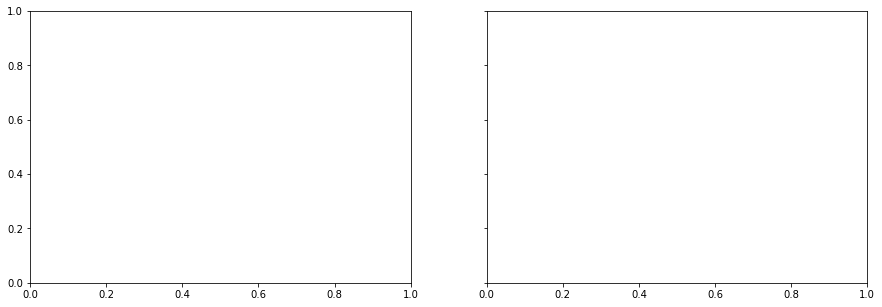

In [264]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True,figsize = (15,5))


In [289]:
"www".

'WWW'

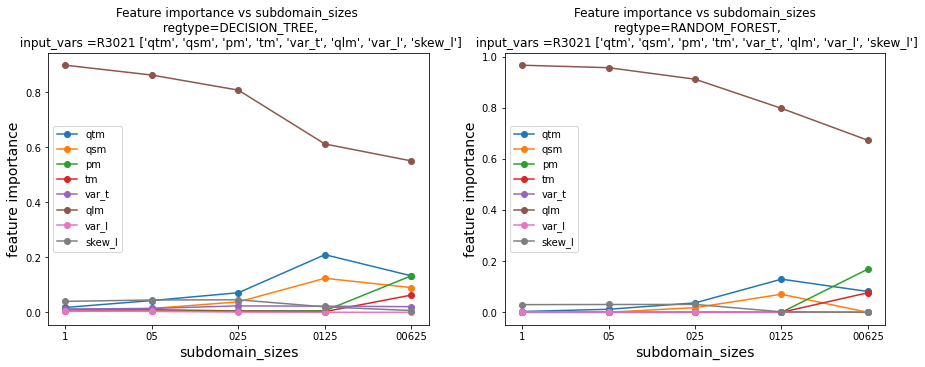

In [293]:
Rid = 'R3021' #0123
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

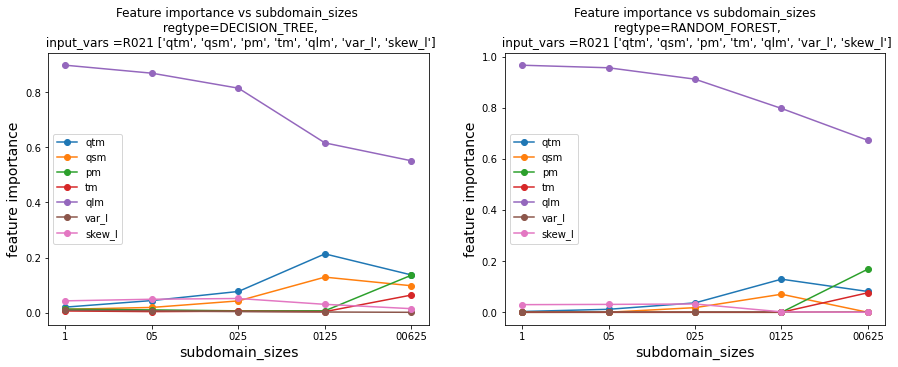

In [294]:
Rid = 'R021' #012
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

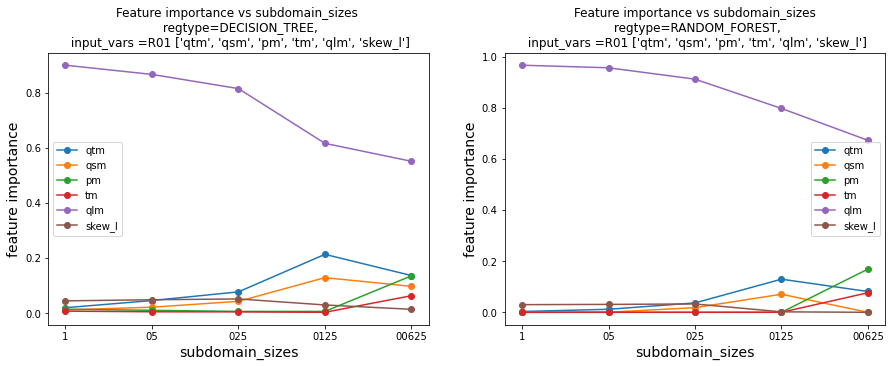

In [295]:
Rid = 'R01' #01
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

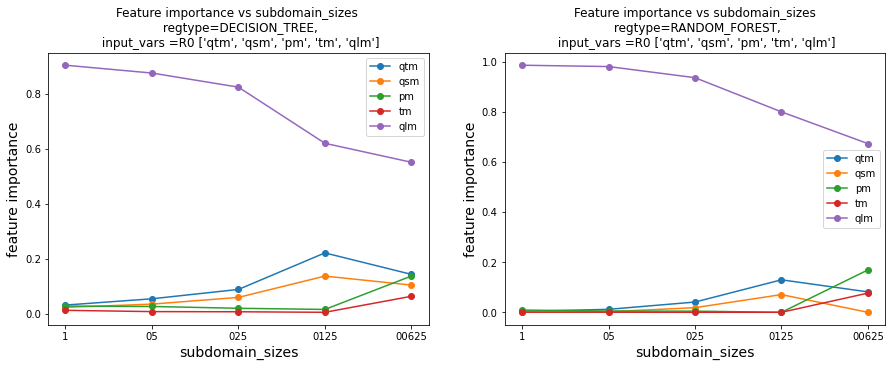

In [296]:
Rid = 'R0' #0
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

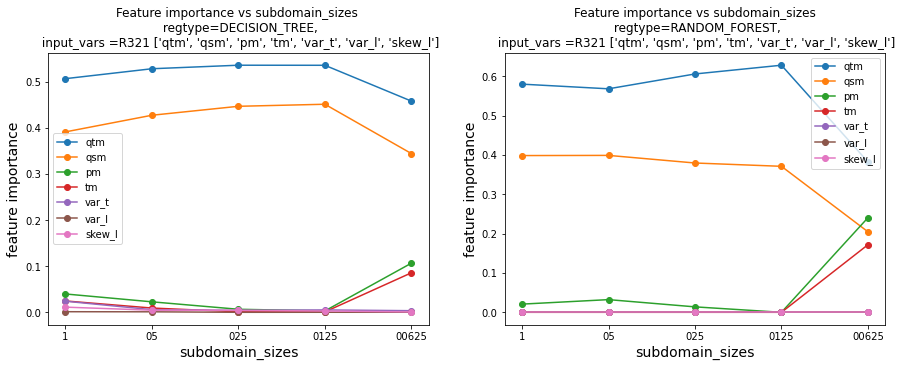

In [298]:
Rid = 'R321' #123
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

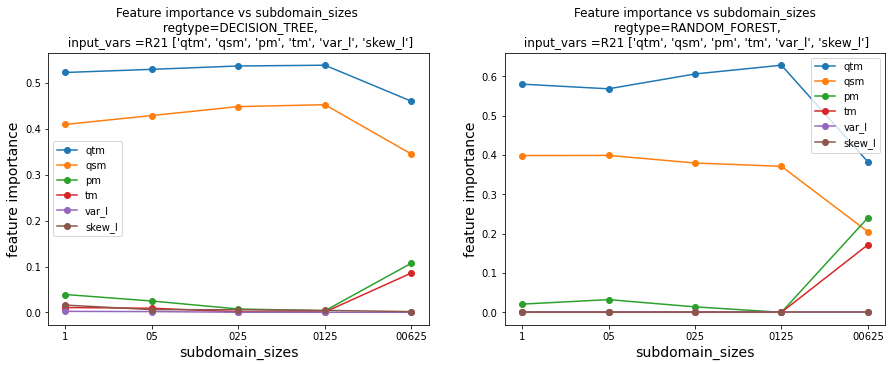

In [299]:
Rid = 'R21' #12
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);

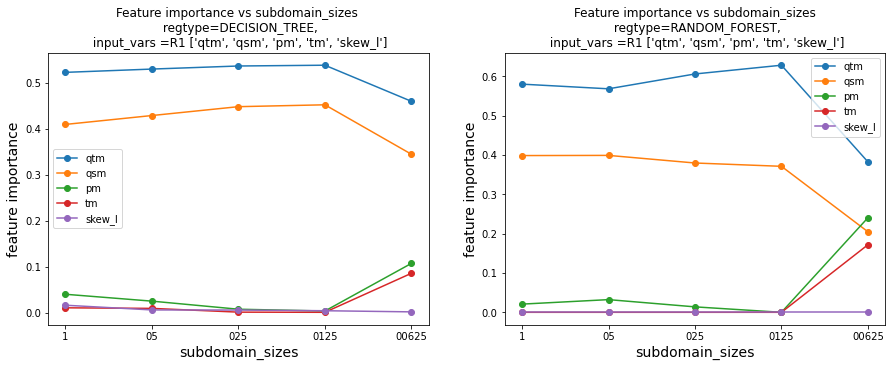

In [300]:
Rid = 'R1' #1
regtype1 = 'decision_tree'
regtype2 = 'random_forest'

xvar = 'subdomain_sizes'
df1=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype1}')]
df2=pandict[f'{Rid}'].loc[(df_merged['regtypes']==f'{regtype2}')]
input_vars = df1.iloc[0]["input_vars"].strip("[]''").split(",")
###
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (15,5))
ax1.title.set_text(f'Feature importance vs {xvar} \n regtype={regtype1.upper()},\n input_vars ={Rid} {input_vars}')
ax2.title.set_text(f'Feature importance vs {xvar}\n regtype={regtype2.upper()},\n input_vars ={Rid} {input_vars}')
for ivar in input_vars:
    ax1.plot(df1[xvar],df1[f'{ivar}'],'-o',label=f'{ivar}')
    ax2.plot(df2[xvar],df2[f'{ivar}'],'-o',label=f'{ivar}')

ax1.legend()
ax2.legend()
ax1.set_xlabel(f'{xvar}',fontsize = 14)
ax1.set_ylabel('feature importance',fontsize = 14)
ax2.set_xlabel(f'{xvar}',fontsize = 14)
ax2.set_ylabel('feature importance',fontsize = 14);